# Customer Spending Analysis Using Statistical Inference

## 🎯 Business Problem Statement
The business wants to evaluate whether a promotional campaign led to a statistically significant increase in customer spending.

**Objective:**  
Use statistical inference to determine if average customer spending increased after the promotion and provide a data-driven recommendation.



## 📂 Dataset

The dataset contains customer spending information before and after a promotion.

**Key Variables**
- `customer_id`: Unique customer identifier  
- `period`: Before or After promotion  
- `spending`: Amount spent by customer


In [18]:
import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.DataFrame({
    "customer_id": range(1, 101),
    "period": ["Before"] * 50 + ["After"] * 50,
    "spending": np.concatenate([
        np.random.normal(200, 30, 50),
        np.random.normal(230, 35, 50)
    ])
})

df.head()


,customer_id,period,spending
0,1,Before,214.901425
1,2,Before,195.852071
2,3,Before,219.430656
3,4,Before,245.690896
4,5,Before,192.975399


## 📊 Exploratory Data Analysis (EDA)

This section visually explores customer spending patterns before and after the promotion to identify trends and differences.


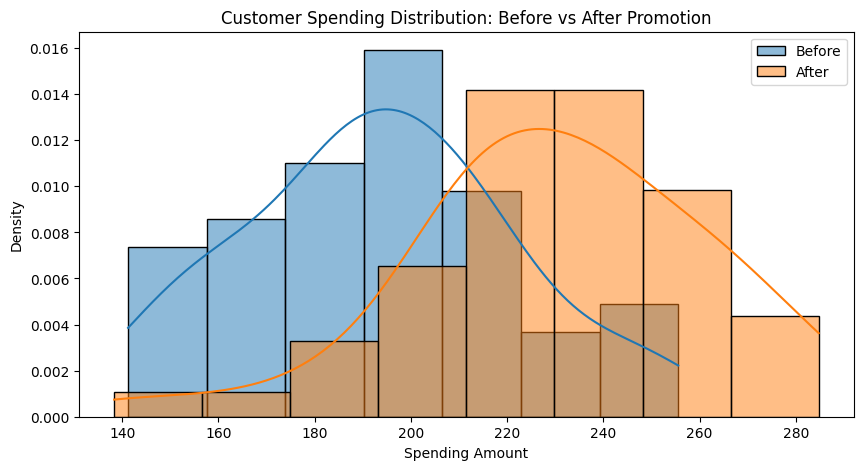

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

before = df[df["period"] == "Before"]["spending"]
after = df[df["period"] == "After"]["spending"]

plt.figure(figsize=(10,5))
sns.histplot(before, kde=True, label="Before", stat="density")
sns.histplot(after, kde=True, label="After", stat="density")

plt.title("Customer Spending Distribution: Before vs After Promotion")
plt.xlabel("Spending Amount")
plt.ylabel("Density")
plt.legend()
plt.show()


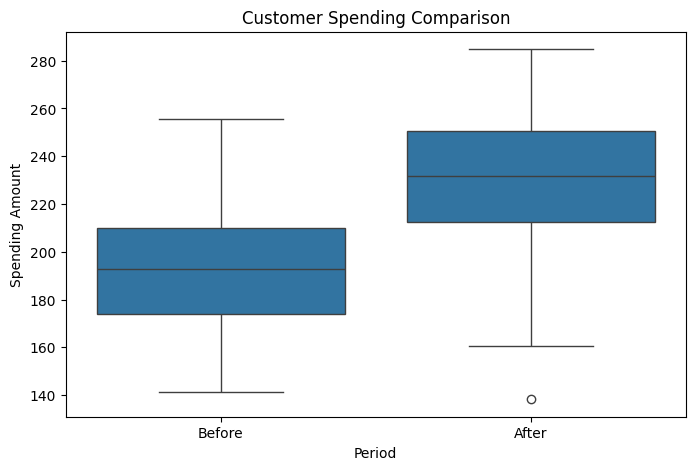

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="period", y="spending", data=df)
plt.title("Customer Spending Comparison")
plt.xlabel("Period")
plt.ylabel("Spending Amount")
plt.show()


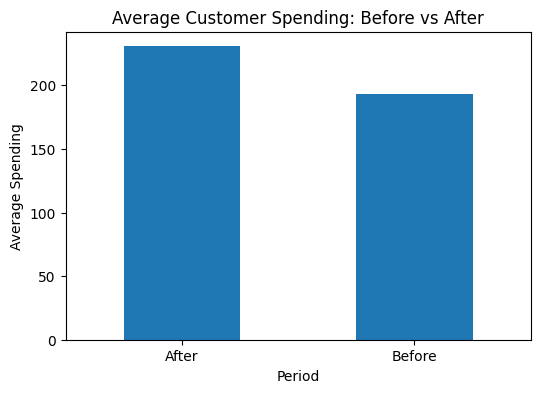

In [21]:
mean_spending = df.groupby("period")["spending"].mean()

mean_spending.plot(kind="bar", figsize=(6,4))
plt.title("Average Customer Spending: Before vs After")
plt.ylabel("Average Spending")
plt.xlabel("Period")
plt.xticks(rotation=0)
plt.show()


### 🔍 EDA Insights
- Customer spending appears higher after the promotion.
- Median and average spending increased post-promotion.
- Distribution shifts to the right after promotion.


## 📌 Point Estimation (Average Spending)

Point estimation uses sample means to estimate average customer spending before and after the promotion.


In [22]:
before_mean = before.mean()
after_mean = after.mean()

before_mean, after_mean


(np.float64(193.23578284231579), np.float64(230.6223304663783))

## 📐 Interval Estimation (95% Confidence Interval)

A confidence interval estimates the range in which the true average customer spending is likely to fall.


In [23]:
from scipy import stats

ci_low, ci_high = stats.t.interval(
    0.95,
    len(after) - 1,
    loc=after_mean,
    scale=stats.sem(after)
)

ci_low, ci_high


(np.float64(221.925516042089), np.float64(239.3191448906676))

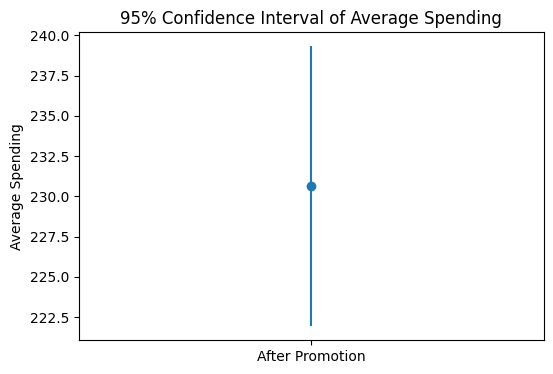

In [24]:
plt.figure(figsize=(6,4))
plt.errorbar(x=0, y=after_mean,
             yerr=[[after_mean - ci_low], [ci_high - after_mean]],
             fmt='o')

plt.xticks([0], ["After Promotion"])
plt.ylabel("Average Spending")
plt.title("95% Confidence Interval of Average Spending")
plt.show()


## 🧪 Hypothesis Testing (Promotion Effect)

We test whether the promotion caused a statistically significant increase in customer spending.


**Hypotheses**
- H₀: The promotion does not change average spending  
- H₁: The promotion increases average spending


In [25]:
t_stat, p_value = stats.ttest_ind(after, before, equal_var=False)

t_stat, p_value


(np.float64(6.37248685724264), np.float64(6.217530268437086e-09))

### ✅ Test Result Interpretation

- Significance level (α): 0.05  
- p-value < 0.05 → Reject the null hypothesis  

**Conclusion:**  
The promotion resulted in a statistically significant increase in customer spending.


## 💼 Final Business Conclusion & Recommendation

### Conclusion
Statistical analysis confirms that customer spending increased significantly after the promotion.

### Recommendation
- Continue or scale the promotion
- Focus future campaigns on similar customer segments
- Monitor long-term spending behavior for sustainability


## 🛠️ Skills Demonstrated
- Statistical inference (point & interval estimation)
- Hypothesis testing
- Data visualization
- Business decision-making
- Python (Pandas, Matplotlib, Seaborn, SciPy)


## 🚀 Portfolio Summary

This project demonstrates my ability to apply statistical inference techniques to real business problems, analyze customer behavior, and translate analytical results into actionable business recommendations.
